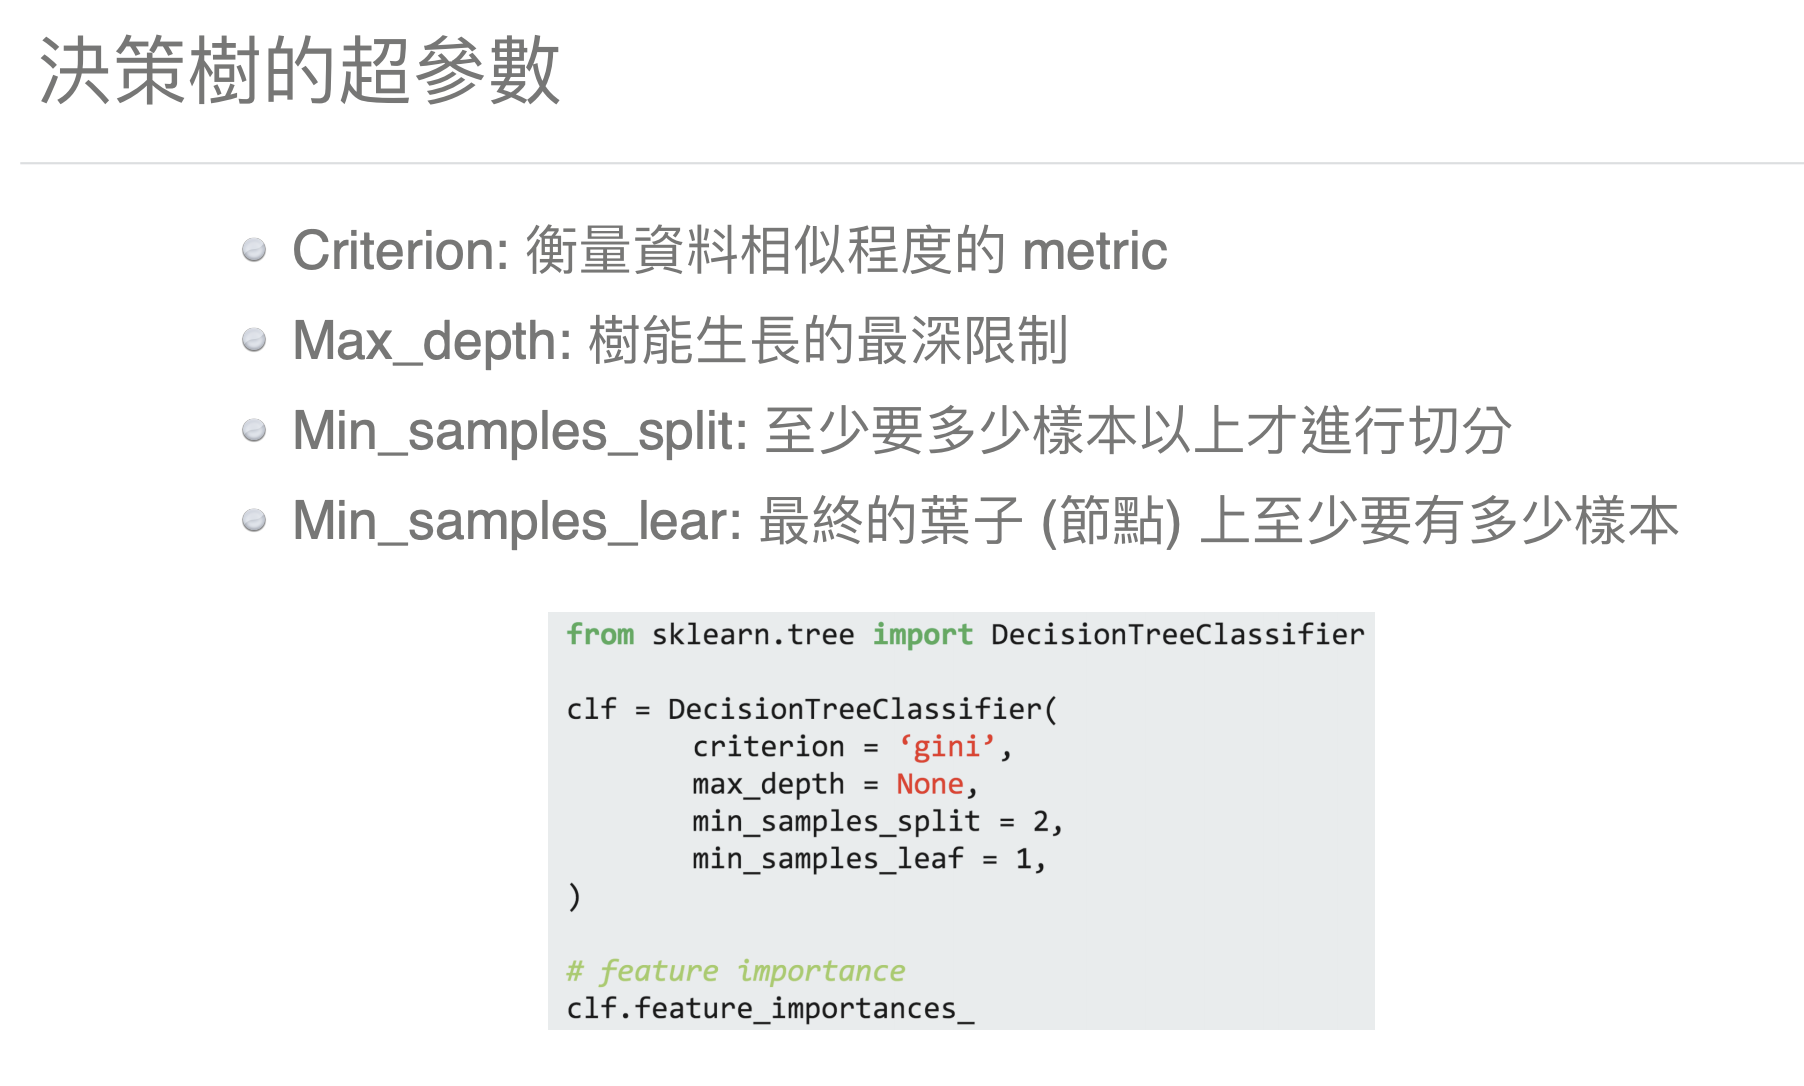

## [範例重點]

了解機器學習建模的步驟、資料型態以及評估結果等流程

In [1]:
from sklearn import datasets, metrics
import pandas as pd

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)

讀取資料的方法：
- 使用 pandas 讀取 .csv 檔：pd.read_csv
- 使用 numpy 讀取 .txt 檔：np.loadtxt
- 使用 Scikit-learn 內建的資料集：sklearn.datasets.load_xxx
- 檢查資料數量：data.shape (data should be np.array or dataframe)


2. 將資料切為訓練 (train) / 測試 (test)

train_test_split(data)

3. 建立模型，將資料 fit 進模型開始訓練

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估

clf.predict(x_test)

accuracy_score(y_test, y_pred)

f1_score(y_test, y_pred)

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.01796599 0.52229134 0.45974266]


In [6]:
df_FI = pd.DataFrame({"feature" : iris.feature_names, "Feature importance" : clf.feature_importances_})
df_FI

,feature,Feature importance
0,sepal length (cm),0.000000
1,sepal width (cm),0.017966
2,petal length (cm),0.522291
3,petal width (cm),0.459743


## [作業重點]

目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理
成相同的格式，才能送進模型訓練。 今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預
測結果的影響為何

## 作業

試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [7]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=87)


# Grid Search - to find best parameter set
from sklearn.model_selection import GridSearchCV   
clf = DecisionTreeClassifier(random_state = 87) # rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
# 列出參數組合
param_grid = {"criterion" : ["entropy", "gini"],
              "max_depth" : [2,4,6,8,10],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10] 
             }
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 87),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "accuracy")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

# 建立由目前training set找出最佳參數組合的模型
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("Test accuracy : %.4f" % clf.score(X_test, y_test))

best_score  : 0.9464285714285714
best_params : {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 

Test accuracy : 0.9737


/Users/johnsonhuang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
# 預測測試集
y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [9]:
# 讀取資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=87)


# Grid Search - to find best parameter set
from sklearn.model_selection import GridSearchCV   
clf = DecisionTreeClassifier(random_state = 87) # rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
# 列出參數組合
param_grid = {"criterion" : ["entropy", "gini"],
              "max_depth" : [2,4,6,8,10],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10] 
             }
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 87),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "accuracy")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

# 建立由目前training set找出最佳參數組合的模型
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("Test accuracy : %.4f" % clf.score(X_test, y_test))

best_score  : 0.9548872180451128
best_params : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2} 

Test accuracy : 0.9111


/Users/johnsonhuang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
# DecisionTreeRegressor

# 讀取資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=87)


# Grid Search - to find best parameter set
from sklearn.model_selection import GridSearchCV   
clf = DecisionTreeClassifier(random_state = 87) # rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
# 列出參數組合
param_grid = {"criterion" : ["mse", "mae"],
              "max_depth" : [2,4,6,8,10],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10] 
             }
gs = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 87),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "neg_mean_squared_error")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

# 建立由目前training set找出最佳參數組合的模型
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("Test accuracy : %.4f" % clf.score(X_test, y_test))

best_score  : -23.364109498680744
best_params : {'criterion': 'mae', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2} 

Test accuracy : 0.7096


/Users/johnsonhuang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
